In [35]:
#Name: Asita Ganatra
#PRN: 22070521003
#Dataset: Stock Market Dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from PIL import Image
import os

# Define the file name
file_name = 'Stock_Market_Dataset.xlsx - Sheet1.csv'

# Load the dataset
try:
    df = pd.read_csv(file_name)
    print("Data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at '{file_name}'")

Error: File not found at 'Stock_Market_Dataset.xlsx - Sheet1.csv'


In [37]:
# Clean column names
df.rename(columns={
    'Close*': 'Close',
    'Adj Close**': 'Adj_Close'
}, inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Sort by Date
df.sort_values('Date', inplace=True)

print("\nData after preprocessing:")
print(df.info())


Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1257 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj_Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.6 KB
None


In [38]:
print("\nGenerating exploratory plots...")
sns.set_style("whitegrid")

# Plot 1: Time Series of Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.savefig('time_series_close.png')
plt.clf() # Clear the figure

# Plot 2: Scatter Plot (Open vs. Close)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Open', y='Close')
plt.title('Relationship Between Opening and Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.savefig('scatter_open_close.png')
plt.clf() # Clear the figure

print("Saved 'time_series_close.png' and 'scatter_open_close.png'.")


Generating exploratory plots...
Saved 'time_series_close.png' and 'scatter_open_close.png'.


<Figure size 1200x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [39]:
# Define X (independent variable) and Y (dependent variable)
X = df[['Open']] # Needs to be a 2D array for sklearn
Y = df['Close']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1006 samples
Testing set size: 252 samples


In [40]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


In [41]:
# Get model coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

print("\n--- Simple Linear Regression Model Results ---")
print(f"Intercept (b): {intercept}")
print(f"Coefficient (m) for 'Open': {coefficient}")
print(f"The model equation is: Close = {coefficient:.4f} * Open + {intercept:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Model Performance Metrics (on Test Set) ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


--- Simple Linear Regression Model Results ---
Intercept (b): 100.27809590911056
Coefficient (m) for 'Open': 0.9965693435593619
The model equation is: Close = 0.9966 * Open + 100.2781

--- Model Performance Metrics (on Test Set) ---
R-squared (R²): 0.9942
Mean Absolute Error (MAE): 210.75
Root Mean Squared Error (RMSE): 294.45


In [23]:
# Step 4: Choose dependent and independent variables
# Rename 'Close*' to 'Close' for consistency with the task description
df.rename(columns={'Close*': 'Close'}, inplace=True)
X = df[['Open']]   # Independent variable
y = df['Close']    # Dependent variable

In [24]:
# Step 5: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 6: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

In [27]:
# Step 8: Evaluate the model
print("\nModel Evaluation Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Evaluation Metrics:
Mean Absolute Error: 204.87196943684768
Mean Squared Error: 86846.33420129889
R² Score: 0.9946453497353263


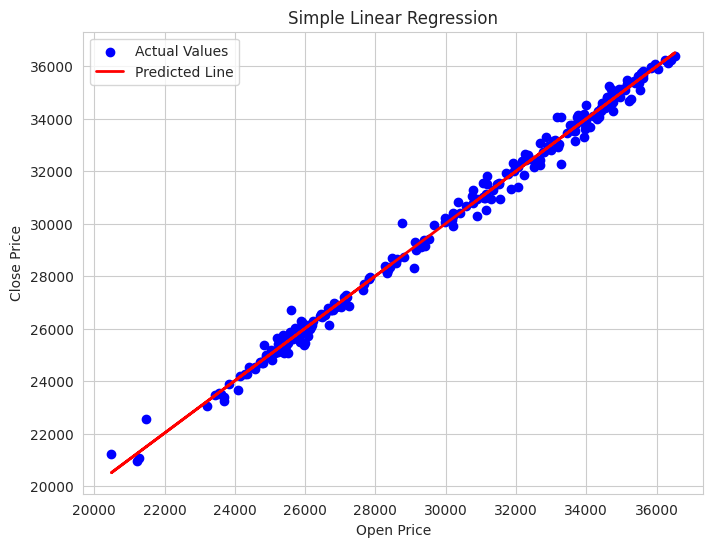

In [28]:
# Step 9: Visualize results
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Simple Linear Regression')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [42]:
# Step 10: Print coefficients
print("\nRegression Equation: Close = {:.4f} * Open + {:.4f}".format(model.coef_[0], model.intercept_))


Regression Equation: Close = 0.9966 * Open + 100.2781


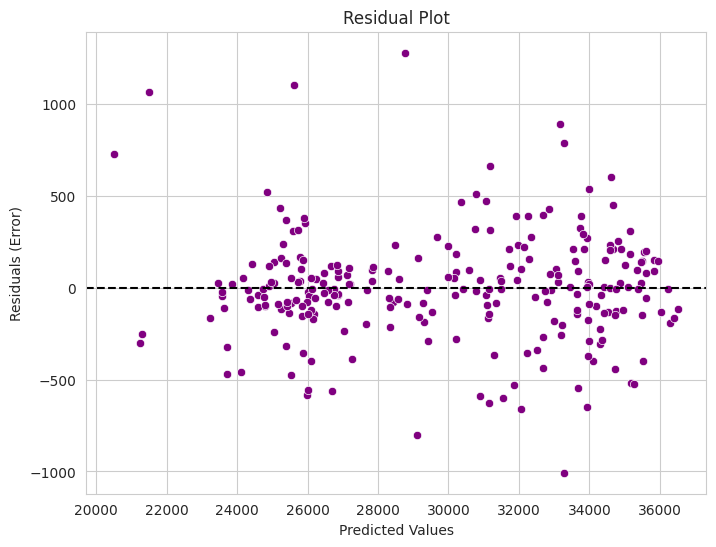

In [31]:
#Residual Plot (to check error distribution)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.show()